Exploratory Principal Component Analysis for Kaggle Ames Iowa Housing Prices Competition

Libraries necessary for the work

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.2) #adopting James' convention

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pylab 
import scipy.stats as stats

from scipy.stats import skew
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import cross_val_score

In [4]:
# Read in train and test sets
train = pd.read_csv('Datasets/train.csv')
test = pd.read_csv('Datasets/test.csv')

In [5]:
#following James's approach 
# Concat. train[no ID column, ... (all columns) ..., no SalePrice column]
#     with test[no ID column, ... (all columns) ..., no SalePrice column]
# (Test data has no SalePrice column anyway)
# we will log xform overly skewed variables

train_test = pd.concat([train.loc[:,'MSSubClass':'SaleCondition'],
                         test.loc[:,'MSSubClass':'SaleCondition']]);

train_test.shape

# deal with skew through log x-formation, add one to argument
train.SalePrice = np.log(1 + train.SalePrice)

# we have selected a skew value of 0.6 to be our threshold 

# Likewise, log transform those skewed numeric features
from scipy.stats import skew

# Set the threshold for being over-skewed
# (can tune later)
skew0 = 0.6;
numeric_features = train_test.dtypes[train_test.dtypes != "object"].index

skewed_features = train[numeric_features].apply(lambda x: skew(x.dropna())) 
skewed_features = skewed_features[abs( skewed_features ) > skew0]
skewed_features = skewed_features.index
train_test[skewed_features] = np.log(1 + train_test[skewed_features])

In [6]:
train_test = pd.get_dummies(train_test)
# filling in NAs - we agreed to impute w/ median
#save copy of data 
train_test.to_csv('./Datasets/train_test.csv')

In [7]:
X_train = train_test[:train.shape[0]].reset_index(drop = True)
X_test  = train_test[train.shape[0]:]
Y_train = train.SalePrice

In [8]:
X_train.to_csv('./Datasets/X_train.csv')
X_test.to_csv('./Datasets/X_test.csv')
Y_train.to_csv('./Datasets/X_train.csv')

In [9]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,1.791759,7.602900,2003,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,2.197225,7.589336,1976,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,1.791759,7.601902,2002,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,1.791759,7.557995,1970,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,1.791759,7.601402,2000,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0


In [10]:
X_train.max()
X_train.isnull().values.any()

True

In [11]:
X_train.isnull().values.any()
print(X_train.isnull().sum().to_string())
# so there are 259 missing values for Lot Frontage and 81 for Garage Year Built

MSSubClass                 0
LotFrontage              259
LotArea                    0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
MasVnrArea                 8
BsmtFinSF1                 0
BsmtFinSF2                 0
BsmtUnfSF                  0
TotalBsmtSF                0
1stFlrSF                   0
2ndFlrSF                   0
LowQualFinSF               0
GrLivArea                  0
BsmtFullBath               0
BsmtHalfBath               0
FullBath                   0
HalfBath                   0
BedroomAbvGr               0
KitchenAbvGr               0
TotRmsAbvGrd               0
Fireplaces                 0
GarageYrBlt               81
GarageCars                 0
GarageArea                 0
WoodDeckSF                 0
OpenPorchSF                0
EnclosedPorch              0
3SsnPorch                  0
ScreenPorch                0
PoolArea                   0
MiscVal                    0
MoSold        

In [12]:
LF = X_train.LotFrontage.mean()
LA = X_train.LotArea.mean()
L_frac = LF/LA
print(L_frac)

0.4617631974623676


In [13]:
X_train['LotFrontage'] = X_train.apply(
    lambda row: L_frac*row['LotArea'] if np.isnan(row['LotFrontage']) else row['LotFrontage'],
    axis=1)

In [14]:
X_train.drop(['GarageYrBlt'], axis = 1, inplace = True)

In [15]:
X_train.drop(['MasVnrArea'], axis = 1, inplace = True)

In [16]:
X_train.isnull().values.any()

False

In [17]:
X_pca = RobustScaler().fit_transform(X_train)


In [18]:
type(X_pca)

numpy.ndarray

In [19]:
np.size(X_train,1)

286

In [20]:
pca = PCA(n_components=30).fit(X_pca)

X_pca = pca.transform(X_pca)

In [21]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

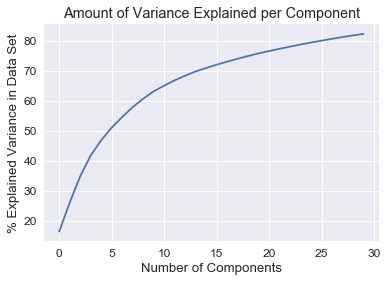

In [22]:
plt.plot(var)
plt.ylabel('% Explained Variance in Data Set')
plt.xlabel('Number of Components')
plt.title('Amount of Variance Explained per Component')
plt.show()

In [23]:
X_train.keys()

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=286)

In [24]:
pca.explained_variance_ratio_

array([0.16499372, 0.09593226, 0.08785411, 0.06921923, 0.05097975,
       0.04165128, 0.03538991, 0.03303823, 0.02779933, 0.02493748,
       0.01887565, 0.01754884, 0.01569496, 0.01387304, 0.01149014,
       0.01115476, 0.01004604, 0.00970546, 0.00918668, 0.00855676,
       0.00789685, 0.00739498, 0.0073274 , 0.00712213, 0.00657218,
       0.00621406, 0.00613335, 0.00590633, 0.0053505 , 0.00516522])

In [25]:
def component_results(data, pca):
    modes = ['Mode {}'.format(i) for i in range(1,len(pca.components_) + 1)]
    components = pd.DataFrame(np.round(pca.components_,4), columns = data.keys())
    components.index = modes
    # variance explained
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = modes
    
    # too many modes currently for plot to be useful
    # Plot the feature weights as a function of the components
    # components.plot(ax = ax, kind = 'bar')
    # ax.set_ylabel("Feature Weights") 
    # ax.set_xticklabels(modes, rotation=0)
    
    # Display the explained variance ratios# 
    # for i, ev in enumerate(pca.explained_variance_ratio_): 
        # ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
    
    # Display the explained variance ratios
    # for i, ev in enumerate(pca.explained_variance_ratio_): 
        # ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
    
    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [26]:
component_results = component_results(X_train, pca)

In [27]:
component_results.to_csv('./Datasets/eigenvectors.csv')

In [28]:
component_results.iloc[0:30,0].cumsum()

Mode 1     0.1650
Mode 2     0.2609
Mode 3     0.3488
Mode 4     0.4180
Mode 5     0.4690
Mode 6     0.5107
Mode 7     0.5461
Mode 8     0.5791
Mode 9     0.6069
Mode 10    0.6318
Mode 11    0.6507
Mode 12    0.6682
Mode 13    0.6839
Mode 14    0.6978
Mode 15    0.7093
Mode 16    0.7205
Mode 17    0.7305
Mode 18    0.7402
Mode 19    0.7494
Mode 20    0.7580
Mode 21    0.7659
Mode 22    0.7733
Mode 23    0.7806
Mode 24    0.7877
Mode 25    0.7943
Mode 26    0.8005
Mode 27    0.8066
Mode 28    0.8125
Mode 29    0.8179
Mode 30    0.8231
Name: Explained Variance, dtype: float64

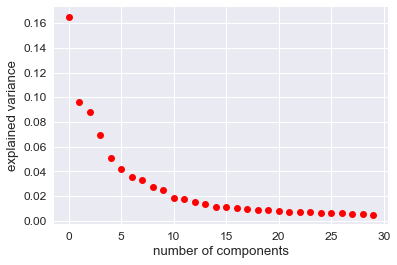

In [29]:
#Explained variance
plt.plot(pca.explained_variance_ratio_, 'ro')
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [30]:
pca.components_

array([[ 2.88573335e-02, -1.40287112e-01, -1.39627543e-01, ...,
        -1.25320006e-04,  1.86749083e-02, -2.78730598e-02],
       [-4.65902930e-02,  9.95623007e-03,  2.30406354e-02, ...,
         1.30713589e-03,  2.29099325e-02, -3.33551637e-02],
       [-4.73786700e-02,  2.67267450e-01,  2.91123674e-01, ...,
        -1.05465041e-03, -1.94735067e-03,  8.48062055e-03],
       ...,
       [ 4.55499767e-02, -2.09534392e-01,  2.05760117e-01, ...,
        -1.24616532e-02, -4.60261203e-02,  2.43724863e-02],
       [-6.55211840e-03, -2.46025808e-01,  2.65451593e-01, ...,
         1.29159832e-02, -1.32677302e-01,  6.65293628e-02],
       [-4.91258205e-02, -1.53522487e-01,  3.07503573e-02, ...,
        -8.27089950e-03,  1.52593672e-01, -6.92132463e-02]])

Now, let's try to apply Linear, Ridge, and Lasso Models

In [35]:
# develop test of rmse to compare across models

def rmse_cv(model):
    rmse = np.sqrt( -cross_val_score(model, X_pca, Y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [36]:
houseRegr = LinearRegression()
houseRegr.fit(X_pca, Y_train)
hept_Y_pred = houseRegr.predict(X_pca)

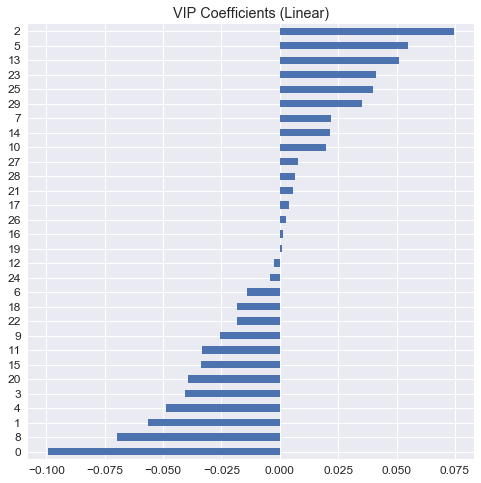

In [37]:
model_lin = houseRegr.fit(X_pca, Y_train);
coeffs_lin = pd.Series(model_lin.coef_, index = X_pca.dtype.names);
vip_coeffs_lin = pd.concat([coeffs_lin.sort_values().head(15),
                              coeffs_lin.sort_values().tail(15)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_lin.plot(kind = "barh");
plt.title("VIP Coefficients (Linear)");

**************************************************
Ridge Performace: R^2 = 0.8804
**************************************************


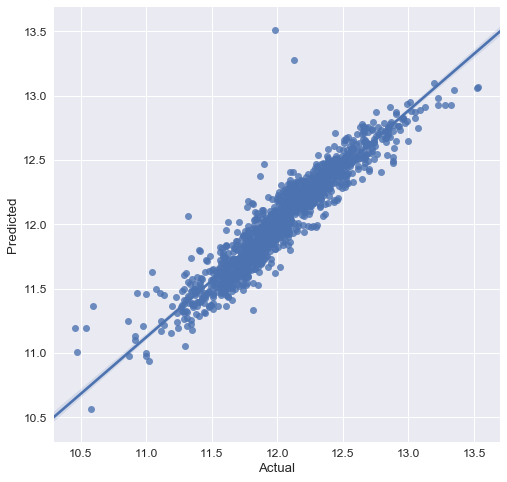

In [38]:
predictions_lin = pd.DataFrame({"Predicted":model_lin.predict(X_pca), 
                                  "Actual":Y_train});
predictions_lin["Residual"] = predictions_lin.Actual - predictions_lin.Predicted;


print('*'*50)
print('Ridge Performace: R^2 = {:.4f}'.format(model_lin.score(X_pca, Y_train)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_lin.Actual, predictions_lin.Predicted);

In [40]:
np.mean(rmse_cv(houseRegr))

0.1416433998252064

In [30]:
model_Ridge = Ridge()

In [31]:
# keeping parameters same as James
# supply a log-ranged alphas from 10^(-2) to 10^(2)
# total: 60 alphas to do CV
alpha_array = np.logspace(-1,2,64)

cv_Ridge = [rmse_cv(Ridge(alpha = Alpha)).mean() for Alpha in alpha_array]

**************************************************
Ridge CV:
Minumum RMSE 0.1424 
achieved at alpha = 37.2759
**************************************************


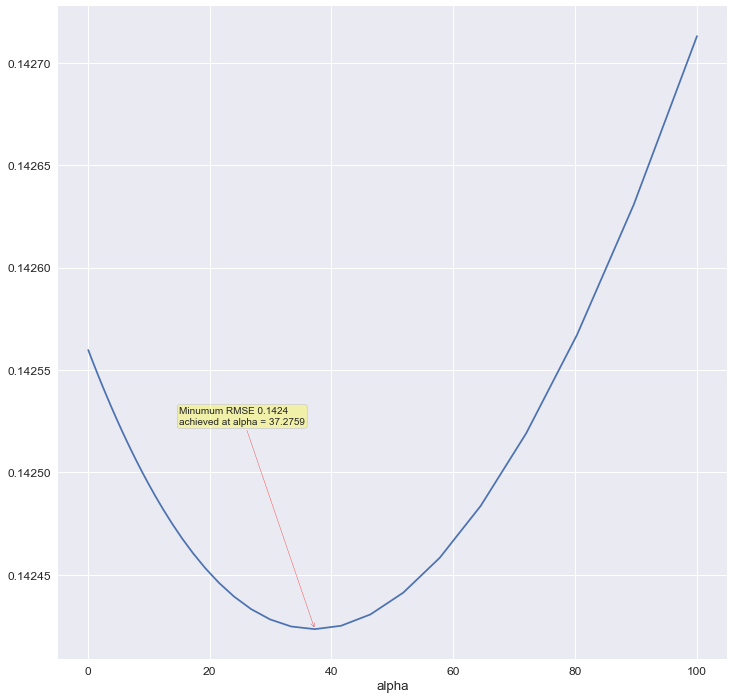

In [32]:
cv_Ridge = pd.Series(cv_Ridge, index = alpha_array)

fig, ax = plt.subplots(figsize=(12,12));
ax.plot(alpha_array,cv_Ridge);
ax.set_xlabel('alpha')
#ax.set_ylabel('RMSE')
alpha0 = cv_Ridge[cv_Ridge == cv_Ridge.min()].index[0];
rmse0 = cv_Ridge.min();
s = 'Minumum RMSE {:.4f} \nachieved at alpha = {:.4f}'.format(rmse0,alpha0)
ax.annotate(s, xy=(alpha0, rmse0),
               xycoords='data',
               xytext=(alpha_array.mean(), cv_Ridge.mean()),
               #textcoords='offset points',
               bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
               arrowprops=dict(arrowstyle='->',color='red'))

print('*'*50)
print('Ridge CV:')
print(s)
print('*'*50)

In [33]:
len(X_pca)

1460

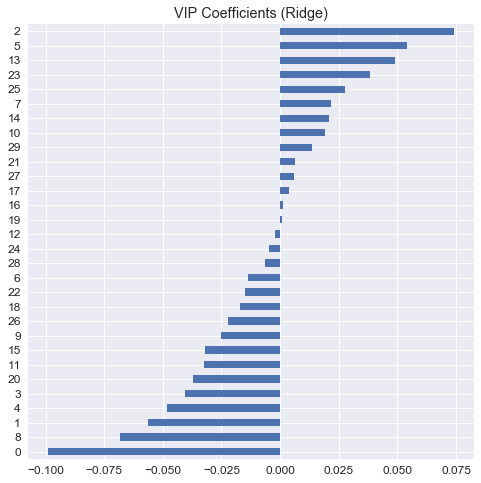

In [34]:
model_Ridge = Ridge(alpha0).fit(X_pca, Y_train);
coeffs_Ridge = pd.Series(model_Ridge.coef_, index = X_pca.dtype.names);
vip_coeffs_Ridge = pd.concat([coeffs_Ridge.sort_values().head(15),
                              coeffs_Ridge.sort_values().tail(15)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_Ridge.plot(kind = "barh");
plt.title("VIP Coefficients (Ridge)");

**************************************************
Ridge Performace: R^2 = 0.8786
**************************************************


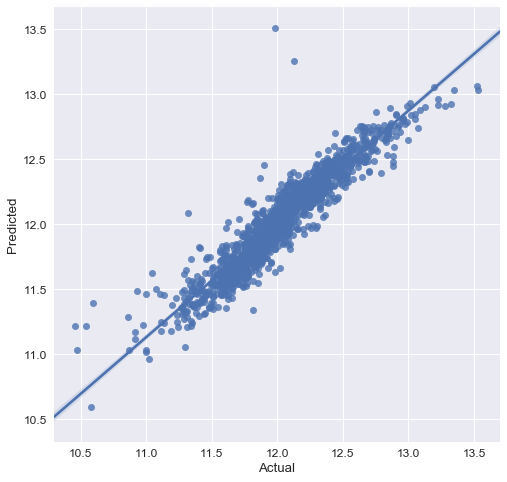

In [35]:
predictions_Ridge = pd.DataFrame({"Predicted":model_Ridge.predict(X_pca), 
                                  "Actual":Y_train});
predictions_Ridge["Residual"] = predictions_Ridge.Actual - predictions_Ridge.Predicted;


print('*'*50)
print('Ridge Performace: R^2 = {:.4f}'.format(model_Ridge.score(X_pca, Y_train)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_Ridge.Actual, predictions_Ridge.Predicted);

In [36]:
model_Lasso = Lasso()
# supply a log-ranged alphas from 10^(-2) to 10^(2)
# total: 60 alphas to do CV
alpha_array = np.logspace(-4,-2,256)

cv_Lasso = [rmse_cv(Lasso(alpha = Alpha)).mean() for Alpha in alpha_array]

In [37]:
len(Y_train)

1460

**************************************************
Lasso CV:
Minumum RMSE 0.1424 
achieved at alpha = 0.0012
**************************************************


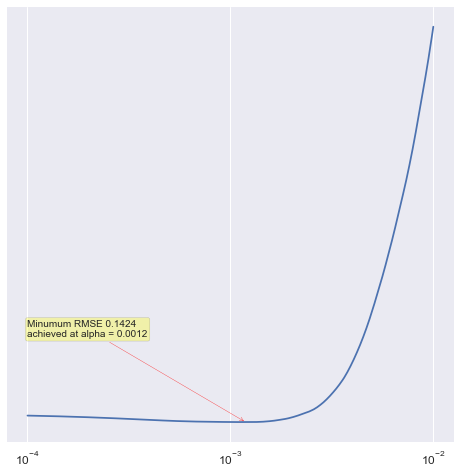

In [38]:
cv_Lasso = pd.Series(cv_Lasso, index = alpha_array)

fig, ax = plt.subplots(figsize=(8,8));
ax.loglog(alpha_array,cv_Lasso);
plt.grid(True);

alpha0 = cv_Lasso[cv_Lasso == cv_Lasso.min()].index[0];
rmse0 = cv_Lasso.min();
s = 'Minumum RMSE {:.4f} \nachieved at alpha = {:.4f}'.format(rmse0,alpha0)
ax.annotate(s, xy=(alpha0, rmse0),
               xycoords='data',
               xytext=(0.0001, 0.144),
               #textcoords='offset points',
               bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
               arrowprops=dict(arrowstyle='->',color='red'))

print('*'*50)
print('Lasso CV:')
print(s)
print('*'*50)

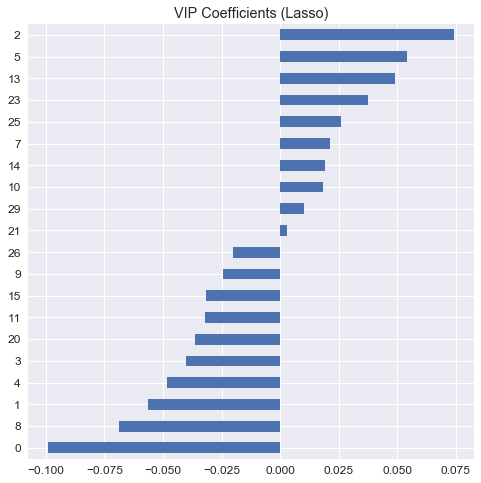

In [39]:
model_Lasso = Lasso(alpha0).fit(X_pca, Y_train);


coeffs_Lasso = pd.Series(model_Lasso.coef_, index = X_pca.dtype.names);
vip_coeffs_Lasso = pd.concat([coeffs_Lasso.sort_values().head(10),
                              coeffs_Lasso.sort_values().tail(10)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_Lasso.plot(kind = "barh");
plt.title("VIP Coefficients (Lasso)");

**************************************************
Lasso Performace: R^2 = 0.8782
**************************************************


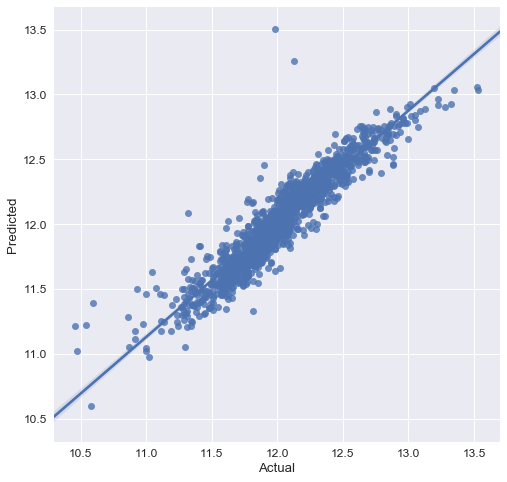

In [40]:
predictions_Lasso = pd.DataFrame({"Predicted":model_Lasso.predict(X_pca), 
                                  "Actual":Y_train});
predictions_Lasso["Residual"] = predictions_Lasso.Actual - predictions_Lasso.Predicted;


print('*'*50)
print('Lasso Performace: R^2 = {:.4f}'.format(model_Lasso.score(X_pca, Y_train)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_Lasso.Actual, predictions_Lasso.Predicted);
#ax.set_title('')

Let's try elastic net

In [41]:
l1_search = np.arange(0.005, 1, step = 0.005)
model_elasticGrid = ElasticNetCV(l1_ratio = l1_search, n_alphas=100, cv =10).fit(X_pca, Y_train);

In [42]:
model_elasticGrid.score(X_pca, Y_train)

0.8780413162233994

In [42]:
np.mean(rmse_cv(model_elasticGrid))

NameError: name 'model_elasticGrid' is not defined

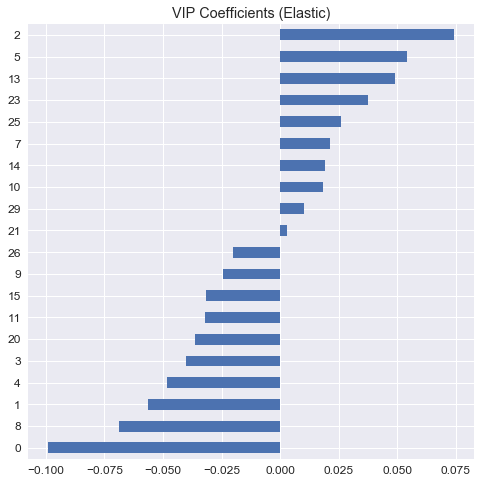

In [44]:
model_elasticGrid = ElasticNetCV(l1_ratio = l1_search, n_alphas=100, cv =10).fit(X_pca, Y_train);


coeffs_elastic = pd.Series(model_elasticGrid.coef_, index = X_pca.dtype.names);
vip_coeffs_elastic = pd.concat([coeffs_elastic.sort_values().head(10),
                              coeffs_elastic.sort_values().tail(10)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_Lasso.plot(kind = "barh");
plt.title("VIP Coefficients (Elastic)");

**************************************************
Elastic Performace: R^2 = 0.8780
**************************************************


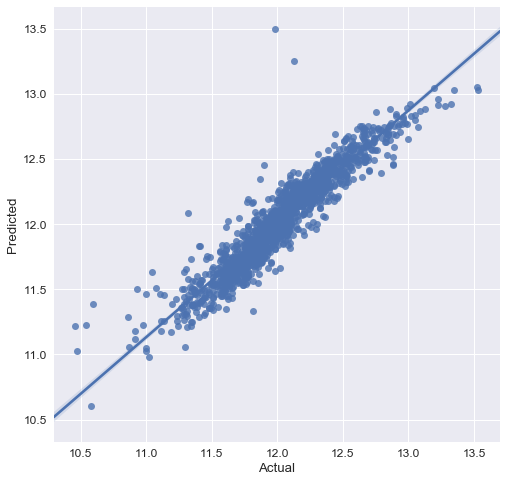

In [45]:
predictions_elastic = pd.DataFrame({"Predicted":model_elasticGrid.predict(X_pca), 
                                  "Actual":Y_train});
predictions_elastic["Residual"] = predictions_elastic.Actual - predictions_elastic.Predicted;


print('*'*50)
print('Elastic Performace: R^2 = {:.4f}'.format(model_elasticGrid.score(X_pca, Y_train)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_elastic.Actual, predictions_elastic.Predicted);
#ax.set_title('')

Elastic has lower RMSE than either Ridge or Lasso, but R^2 is the same as Lasso and less than Ridge. 
VIP coefficients indistinguishable from Ridge

Now on to interpreting eigenmodes

In [43]:
component_results.iloc[0].sort_values() 

TotalBsmtSF            -0.7499
BsmtUnfSF              -0.3252
GarageArea             -0.1631
OverallQual            -0.1572
LotFrontage            -0.1403
LotArea                -0.1396
GarageCars             -0.1394
GrLivArea              -0.1312
1stFlrSF               -0.1281
YearBuilt              -0.1146
TotRmsAbvGrd           -0.0976
YearRemodAdd           -0.0883
Foundation_PConc       -0.0808
FullBath               -0.0770
Fireplaces             -0.0742
ExterQual_Gd           -0.0731
OpenPorchSF            -0.0720
GarageType_Attchd      -0.0705
HeatingQC_Ex           -0.0701
KitchenQual_Gd         -0.0598
BsmtQual_Gd            -0.0575
Exterior2nd_VinylSd    -0.0574
Exterior1st_VinylSd    -0.0567
BsmtFinType1_GLQ       -0.0528
BsmtFinType2_Unf       -0.0497
WoodDeckSF             -0.0492
ScreenPorch            -0.0481
GarageFinish_Fin       -0.0473
BsmtCond_TA            -0.0446
BedroomAbvGr           -0.0436
                         ...  
BldgType_Duplex         0.0159
Neighbor

In [74]:
components = component_results.T.sort_values(by = 'Mode 2')

In [69]:
components.drop(['Explained Variance'], inplace = True)

In [75]:
components.iloc[:,1]

YearBuilt               -0.1538
GarageCars              -0.1276
GarageArea              -0.1205
Foundation_PConc        -0.1150
OverallQual             -0.1140
FullBath                -0.1093
YearRemodAdd            -0.1002
Exterior2nd_VinylSd     -0.0925
Exterior1st_VinylSd     -0.0925
GrLivArea               -0.0898
ExterQual_Gd            -0.0897
HeatingQC_Ex            -0.0787
BsmtQual_Gd             -0.0762
TotRmsAbvGrd            -0.0750
BsmtFinType2_Unf        -0.0749
KitchenQual_Gd          -0.0705
OpenPorchSF             -0.0697
HouseStyle_2Story       -0.0609
BsmtFinType1_GLQ        -0.0595
GarageFinish_Fin        -0.0505
HalfBath                -0.0478
MSSubClass              -0.0466
2ndFlrSF                -0.0455
BsmtUnfSF               -0.0372
SaleType_New            -0.0338
SaleCondition_Partial   -0.0334
WoodDeckSF              -0.0300
MasVnrType_BrkFace      -0.0300
GarageType_Attchd       -0.0299
BsmtFinType1_Unf        -0.0297
                          ...  
BldgType

In [72]:
round(sum(list(map(lambda x: x**2, components.iloc[:,0]))))

1.0